# Neural Network (Gas Turbines)

### predicting turbine energy yield (TEY) using ambient variables as features.

The dataset contains 36733 instances of 11 sensor measures aggregated over one hour (by means of average or sum) from a gas turbine.   
The Dataset includes gas turbine parameters (such as Turbine Inlet Temperature and Compressor Discharge pressure) in addition to the ambient variables.  

The explanations of sensor measurements and their brief statistics are given below.  

Variable (Abbr.) Unit Min Max Mean  
Ambient temperature (AT) C â€“6.23 37.10 17.71  
Ambient pressure (AP) mbar 985.85 1036.56 1013.07  
Ambient humidity (AH) (%) 24.08 100.20 77.87  
Air filter difference pressure (AFDP) mbar 2.09 7.61 3.93  
Gas turbine exhaust pressure (GTEP) mbar 17.70 40.72 25.56  
Turbine inlet temperature (TIT) C 1000.85 1100.89 1081.43  
Turbine after temperature (TAT) C 511.04 550.61 546.16  
Compressor discharge pressure (CDP) mbar 9.85 15.16 12.06  
Turbine energy yield (TEY) MWH 100.02 179.50 133.51  
Carbon monoxide (CO) mg/m3 0.00 44.10 2.37  
Nitrogen oxides (NOx) mg/m3 25.90 119.91 65.29  

# 1. import Libs

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation,Layer,Lambda
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions
from keras.models import Sequential
from keras.callbacks import History 
import tensorflow as tf
history = History()
import warnings
warnings.filterwarnings('ignore')

# 2. Import Data

In [3]:
gas_tubine = pd.read_csv('gas_turbines.csv')
gas_tubine

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


# 3. EDA

In [4]:
gas_tubine.isna().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [5]:
gas_tubine.dtypes

AT      float64
AP      float64
AH      float64
AFDP    float64
GTEP    float64
TIT     float64
TAT     float64
TEY     float64
CDP     float64
CO      float64
NOX     float64
dtype: object

In [6]:
gas_tubine.describe().T

,count,mean,std,min,25%,50%,75%,max
AT,15039.0,17.764381,7.574323,0.522300,11.408000,18.1860,23.8625,34.9290
AP,15039.0,1013.199240,6.410760,985.850000,1008.900000,1012.8000,1016.9000,1034.2000
AH,15039.0,79.124174,13.793439,30.344000,69.750000,82.2660,90.0435,100.2000
AFDP,15039.0,4.200294,0.760197,2.087400,3.723900,4.1862,4.5509,7.6106
GTEP,15039.0,25.419061,4.173916,17.878000,23.294000,25.0820,27.1840,37.4020
TIT,15039.0,1083.798770,16.527806,1000.800000,1079.600000,1088.7000,1096.0000,1100.8000
TAT,15039.0,545.396183,7.866803,512.450000,542.170000,549.8900,550.0600,550.6100
TEY,15039.0,134.188464,15.829717,100.170000,127.985000,133.7800,140.8950,174.6100
CDP,15039.0,12.102353,1.103196,9.904400,11.622000,12.0250,12.5780,15.0810
CO,15039.0,1.972499,2.222206,0.000388,0.858055,1.3902,2.1604,44.1030


### Checking Outlires

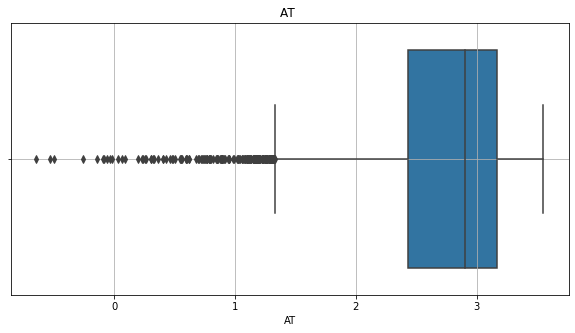

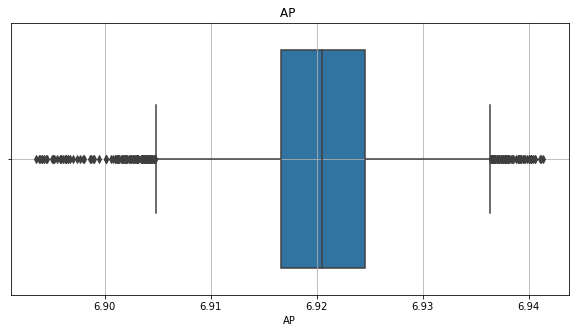

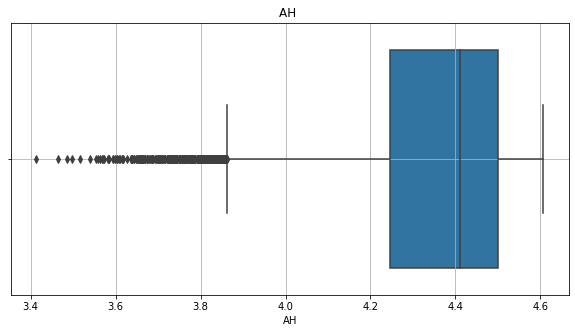

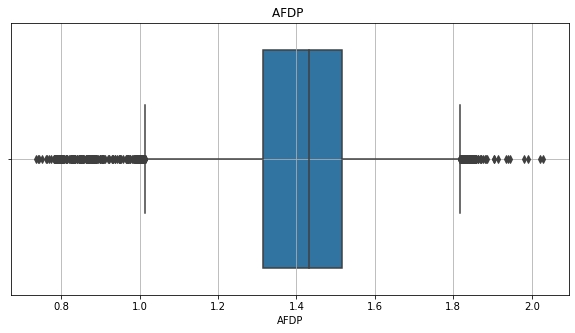

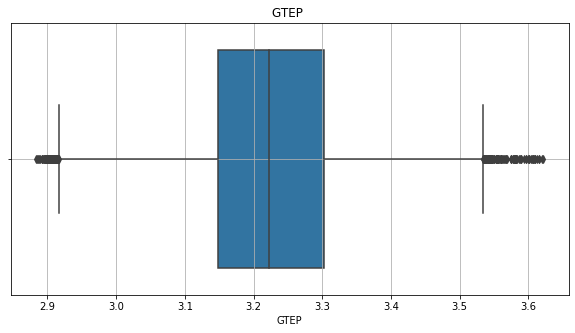

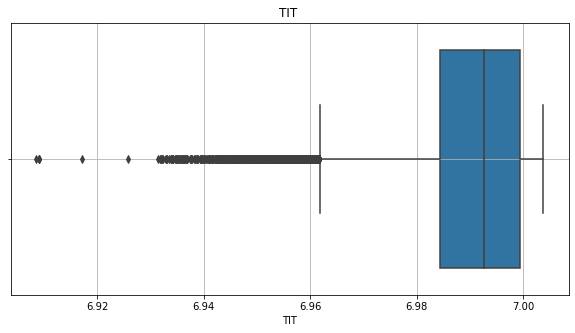

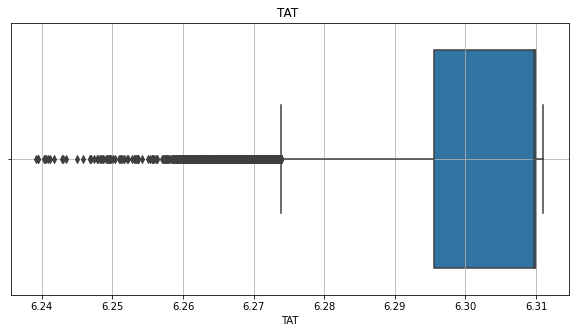

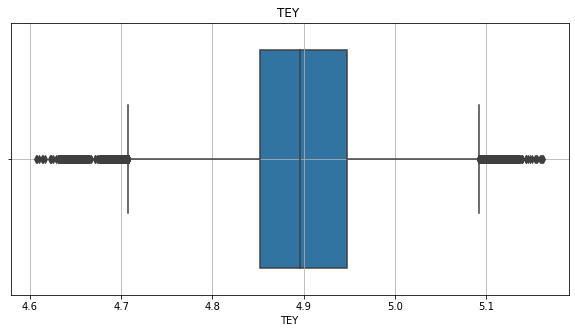

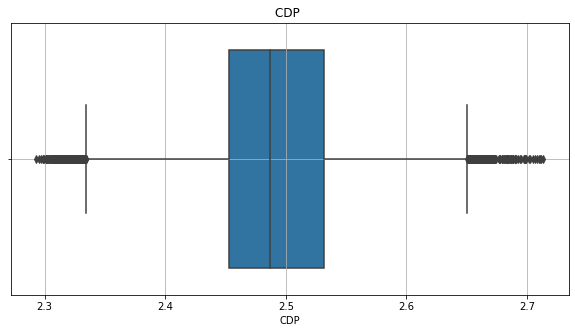

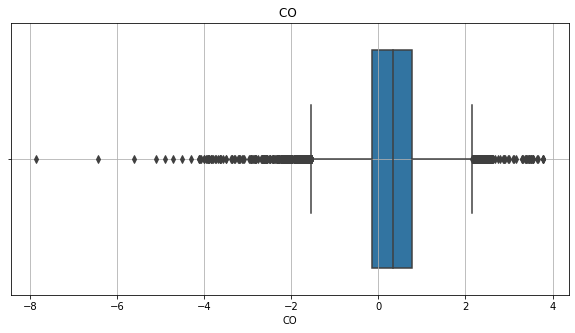

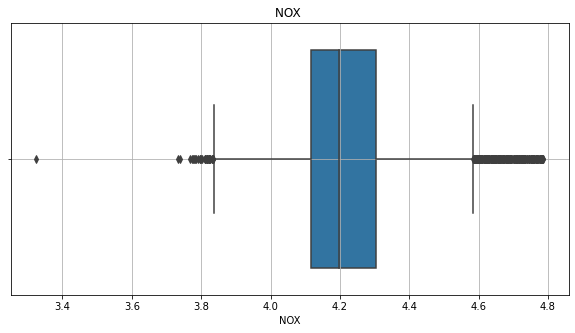

In [7]:

for i in gas_tubine.columns:
        plt.figure(figsize=(10,5))
        sns.boxplot(np.log(gas_tubine[i]))
        plt.title(i+ ' ')
        plt.grid()
        plt.show()

Skewness = 0.14596270190452942
Kurtosis = -0.4870582497451621


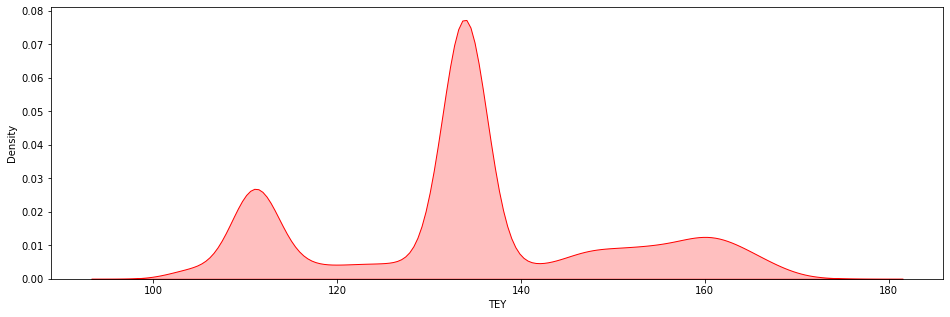

In [8]:
plt.figure(figsize=(16,5))
print("Skewness =",gas_tubine['TEY'].skew())
print("Kurtosis =",gas_tubine['TEY'].kurtosis())
sns.kdeplot(gas_tubine['TEY'],shade=True,color='r')
# plt.xticks([i for i in range(0,1200,50)])
plt.show()

#### The Data is highly skewed and has Negative kurtosis value

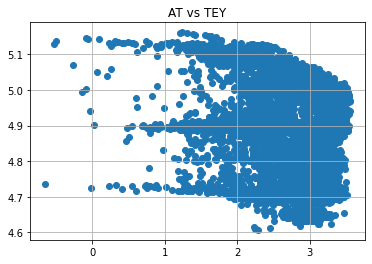

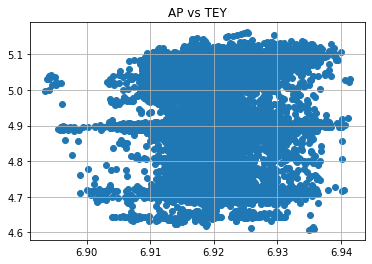

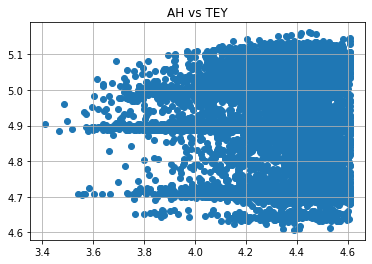

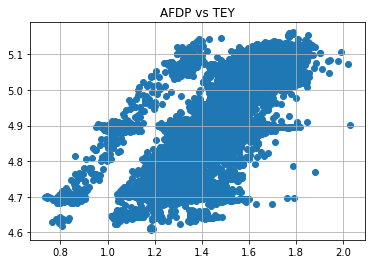

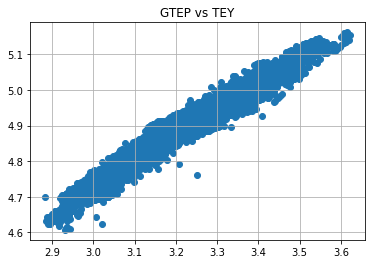

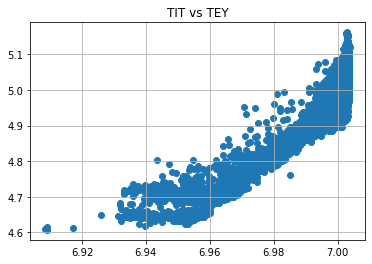

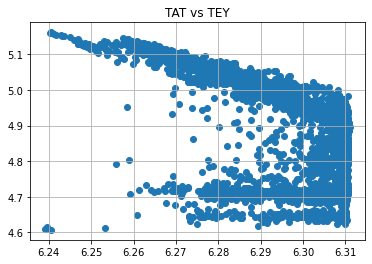

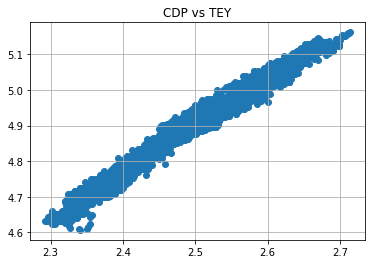

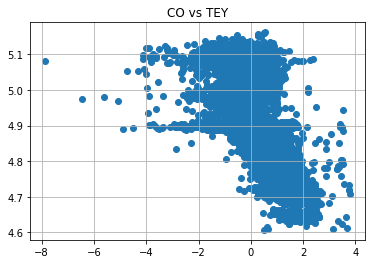

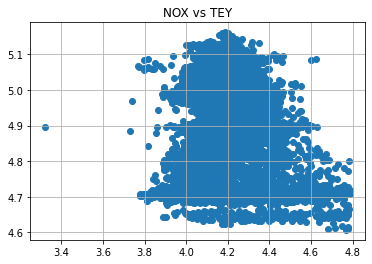

In [9]:
for i in gas_tubine.columns:
    if i!="TEY": 
        plt.scatter(np.log(gas_tubine[i]), np.log(gas_tubine['TEY']))
        plt.title(i+ ' vs TEY')
        plt.grid()
        plt.show()

In [10]:
num_columns = gas_tubine.select_dtypes(exclude='object')

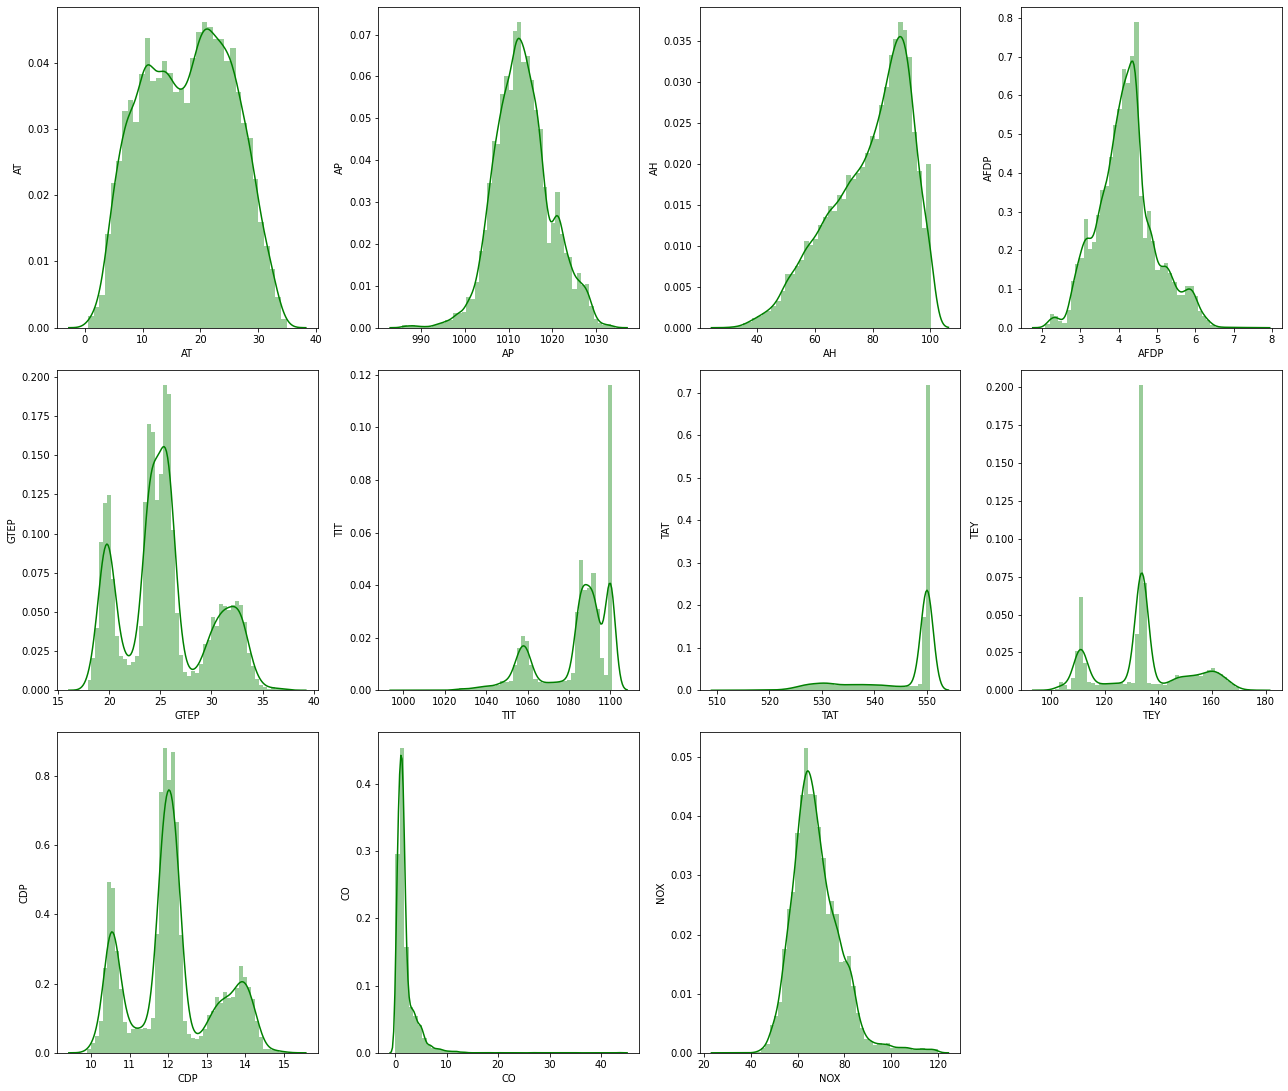

In [11]:
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.distplot(gas_tubine[col],color='g')
    plt.ylabel(col)
plt.tight_layout() 
plt.show()    

In [12]:
pd.DataFrame(data=[num_columns.skew(),num_columns.kurtosis()],index=['skewness','kurtosis'])

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
skewness,-0.030710,0.107601,-0.681224,0.315150,0.370987,-1.133744,-1.485524,0.145963,0.263042,6.534577,1.126605
kurtosis,-0.987597,0.424070,-0.282476,0.281642,-0.618358,0.375232,0.847637,-0.487058,-0.589420,82.518116,2.660381


### Finding Correlation

In [13]:
corr = pd.DataFrame(data = gas_tubine.corr().iloc[:,7], index=gas_tubine.columns)

In [14]:
corr = corr.sort_values(by = 'TEY',ascending=False)
corr

,TEY
TEY,1.000000
CDP,0.988473
GTEP,0.977042
TIT,0.891587
AFDP,0.717995
AP,0.146939
NOX,-0.102631
AH,-0.110272
AT,-0.207495
CO,-0.541751


<AxesSubplot:title={'center':'Correlation plot between Target variables and independent variables'}, ylabel='TEY'>

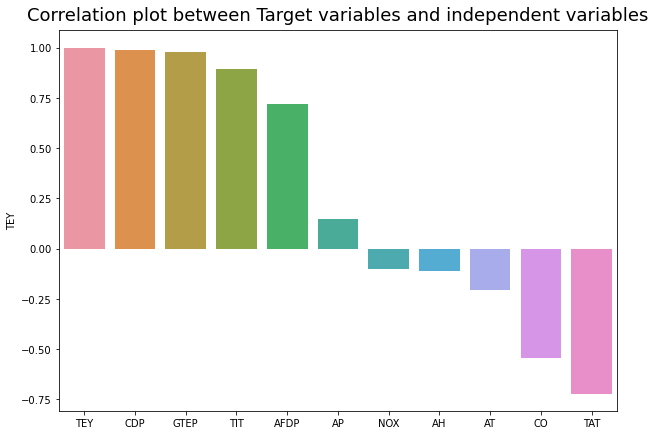

In [15]:
plt.figure(figsize=(10,7))
plt.title("Correlation plot between Target variables and independent variables", y=1.01, fontsize=18)
sns.barplot(x = corr.index, y = corr.TEY)

Text(0.5, 1.0, 'Correlation Map of variables')

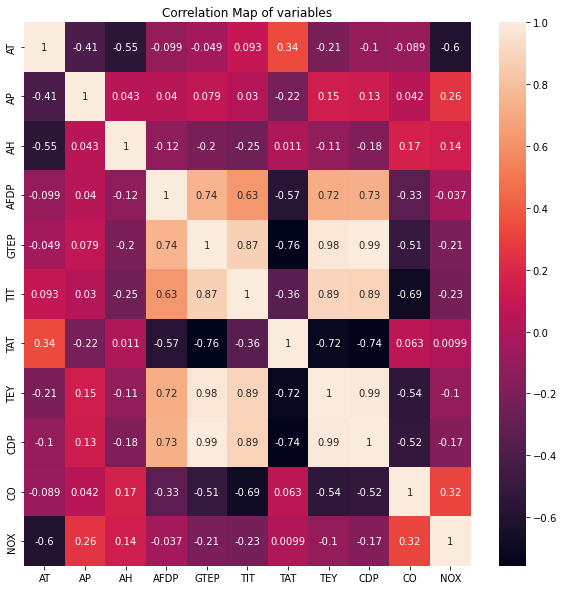

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(gas_tubine.corr(),annot=True)
plt.title("Correlation Map of variables")

# 4. Model Building

####  evaluate the model

In [42]:
scores = model_re.evaluate(x_train, y_train)
print("%s: %.2f%%" % (model_re.metrics_names[1], scores[1]*100))

376/376 [==============================] - 0s 959us/step - loss: -16085.6445 - accuracy: 0.0000e+00
accuracy: 0.00%


In [148]:
model.history.history.keys()

dict_keys([])

In [149]:
hist= print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


### summarize history for accuracy

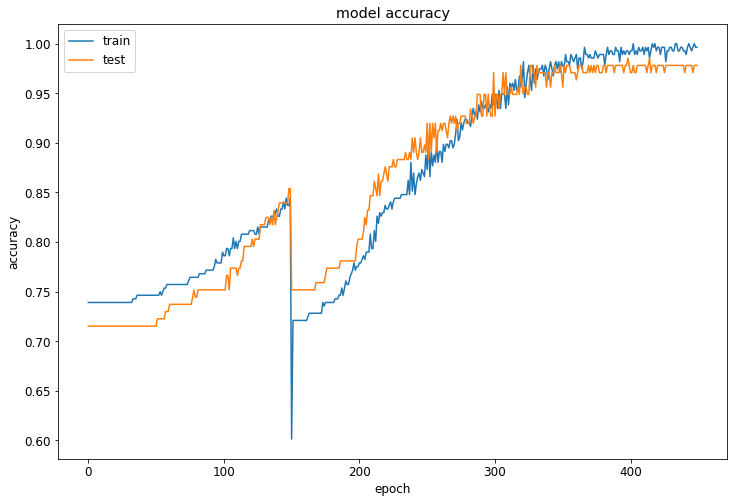

In [150]:
plt.figure(figsize=(12,8))
plt.rcParams['font.size'] = 12
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


### summarize history for loss

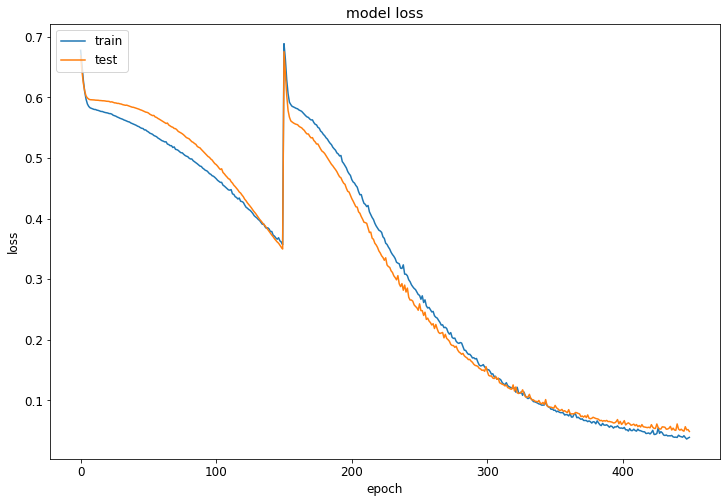

In [151]:
plt.figure(figsize=(12,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### Predicting values from Model using same dataset

In [152]:
def probToBinary(varProb):
    if varProb >= 0.5:
        return 1
    else:
        return 0

#### generating predictions for test data & creating table with test price & predicted price for test

In [156]:
y_predict_test = model.predict(x_test) 


test_prediction = pd.DataFrame()
test_prediction['Test_Actual'] = y_test
test_prediction['Test_Probability'] = y_predict_test
test_prediction['Test_Predicted'] = test_prediction['Test_Probability'].apply(probToBinary)
print(test_prediction.shape)
test_prediction.head(10)

4/4 [==============================] - 0s 2ms/step
(104, 3)


,Test_Actual,Test_Probability,Test_Predicted
0,1,0.899437,1
1,0,0.003865,0
2,1,0.981555,1
3,0,0.002311,0
4,0,0.609429,1
5,0,0.034691,0
6,0,0.004133,0
7,0,0.004449,0
8,0,0.001223,0
9,0,0.005232,0


#### generating predictions for train data & creating table with test price & predicted price for test

In [157]:
y_predict_train = model.predict(x_train)

train_prediction = pd.DataFrame()
train_prediction['Train_Actual'] = y_train
train_prediction['Train_Probability'] = y_predict_train
train_prediction['Train_Predicted'] = train_prediction['Train_Probability'].apply(probToBinary)
print(train_prediction.shape)
train_prediction.head(10)

13/13 [==============================] - 0s 2ms/step
(413, 3)


,Train_Actual,Train_Probability,Train_Predicted
0,0,0.007990,0
1,1,0.999993,1
2,1,0.999912,1
3,1,0.999675,1
4,0,0.005066,0
5,0,0.001392,0
6,1,1.000000,1
7,0,0.178846,0
8,0,0.147317,0
9,1,1.000000,1


### Predicting the probabilities of Forest Burned Area

Text(0, 0.5, 'Frequency')

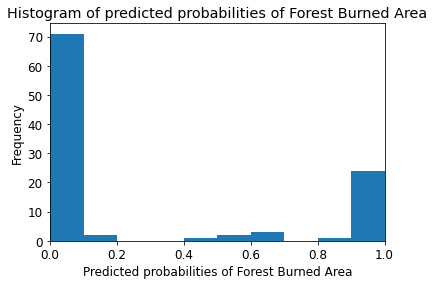

In [158]:
plt.hist(test_prediction['Test_Probability'], bins = 10)
plt.title('Histogram of predicted probabilities of Forest Burned Area')
plt.xlim(0,1)
plt.xlabel('Predicted probabilities of Forest Burned Area')
plt.ylabel('Frequency')

# END